In [ ]:
!pip install torchvision==0.5.0
!pip install torch==1.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.0 MB 14.5 MB/s 
     |████████████████████████████████| 753.4 MB 7.2 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.1+cu113
    Uninstalling torchvision-0.13.1+cu113:
      Successfully uninstalled torchvision-0.13.1+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.1 requires torch==1.12.1, but you have torch 1.4.0 which is incompatible.
torchaudio 0.12.1+cu113 requires torch==1.12.1, but you have torch 1.4.0 which is incompatible.
fastai 2.7.9 requires torch<1.14,>=1.7, but you have torch 1.4

In [ ]:
!git clone https://github.com/guilodron/yolact.git

Cloning into 'yolact'...
remote: Enumerating objects: 8482, done.
remote: Total 8482 (delta 0), reused 0 (delta 0), pack-reused 8482
Receiving objects: 100% (8482/8482), 1.44 GiB | 29.23 MiB/s, done.
Resolving deltas: 100% (2100/2100), done.
Checking out files: 100% (5371/5371), done.


In [ ]:
# Buildando DCNv2 para utilizar o YOLACT++
%cd /content/yolact/external/DCNv2/
!python setup.py build develop

/content/yolact/external/DCNv2
running build
running build_ext
building '_ext' extension
creating build
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/content
creating build/temp.linux-x86_64-3.7/content/yolact
creating build/temp.linux-x86_64-3.7/content/yolact/external
creating build/temp.linux-x86_64-3.7/content/yolact/external/DCNv2
creating build/temp.linux-x86_64-3.7/content/yolact/external/DCNv2/src
creating build/temp.linux-x86_64-3.7/content/yolact/external/DCNv2/src/cpu
creating build/temp.linux-x86_64-3.7/content/yolact/external/DCNv2/src/cuda
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -DWITH_CUDA -I/content/yolact/external/DCNv2/src -I/usr/local/lib/python3.7/dist-packages/torch/include -I/usr/local/lib/python3.7/dist-package

In [ ]:
%cd /content/yolact/
!mkdir weights
%cd weights

/content/yolact
/content/yolact/weights


In [ ]:
!pip install gdown
import gdown
gdown.download(id='1Jy3yCdbatgXa5YYIdTCRrSV0S9V5g1rn')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Downloading...
From: https://drive.google.com/uc?id=1Jy3yCdbatgXa5YYIdTCRrSV0S9V5g1rn
To: /content/yolact/weights/resnet50-19c8e357.pth
100%|██████████| 103M/103M [00:00<00:00, 143MB/s] 


'resnet50-19c8e357.pth'

In [ ]:
%cd /content/yolact
!python train.py --config=yolact_plus_resnet50_bracot_config

/content/yolact
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Initializing weights...
Begin training!

/content/yolact/utils/augmentations.py:310: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mode = random.choice(self.sample_options)
/content/yolact/utils/augmentations.py:310: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mode = random.choice(self.sample_options)
/content/yolact/utils/augmentations.py:310: VisibleDeprecationWarning

In [ ]:
!python eval.py --trained_model=weights/yolact_plus_resnet50_bracot_158_4745_interrupt.pth --output_coco_json

Config not specified. Parsed yolact_plus_resnet50_bracot_config from the file name.

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading model... Done.

Processing Images  ██████████████████████████████     60 /     60 (100.00%)    18.61 fps        
Dumping detections...


In [ ]:
!python eval.py --trained_model=weights/yolact_plus_resnet50_bracot_1090_32701_interrupt.pth --output_coco_json --dataset=bracot2_dataset

Config not specified. Parsed yolact_plus_resnet50_bracot_config from the file name.

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading model... Done.

Processing Images  ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      1 /     60 ( 1.67%)     0.00 fps        tcmalloc: large alloc 1268047872 bytes == 0x738de000 @  0x7fcc8b3f9b6b 0x7fcc8b419379 0x7fcc34d33b4a 0x7fcc34d355fa 0x7fcc3706578a 0x7fcc372ae30b 0x7fcc372f5b37 0x7fcc392b5795 0x7fcc372f5b37 0x7fcc3705e346 0x7fcc3705f6f5 0x7fcc373a3b9a 0x7fcc39089866 0x7fcc373ee5e2 0x7fcc7fa5f020 0x7fcc7fb8b838 0x59b1b0 0x515655 0x549e0e 0x593fce 0x5118f8 0x549e0e 0x593fce 0x5118f8 0x549576 0x604173 0x5f5506 0x5f8c6c 0x5f9206 0x64faf2 0x64fc4e
Processing Images  ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░      4 /     60 ( 6.67%)     0.51 fps        tcmalloc: large alloc 1511907328 bytes == 0x738de000 @  0x7fcc8b3f9b6b 0x7fcc8b419379 0x7fcc34d33b4a 0x7fcc34d355fa 0x7fcc3706578a 0x7fcc372ae30b 0x7fcc372f5b37 0x7fcc392b5795 0x7fcc372f5

In [ ]:
!python eval.py --trained_model=weights/yolact_plus_resnet50_bracot_1090_32701_interrupt.pth --score_threshold=0.15 --top_k=15 --images=dataset/bracot-data/test:output_images

Config not specified. Parsed yolact_plus_resnet50_bracot_config from the file name.

Loading model... Done.

dataset/bracot-data/test/20191208_142250.jpg -> output_images/20191208_142250.png
dataset/bracot-data/test/20191208_141713.jpg -> output_images/20191208_141713.png
dataset/bracot-data/test/20191208_143515.jpg -> output_images/20191208_143515.png
dataset/bracot-data/test/20191208_142720.jpg -> output_images/20191208_142720.png
dataset/bracot-data/test/20191208_142649.jpg -> output_images/20191208_142649.png
dataset/bracot-data/test/20191208_141953.jpg -> output_images/20191208_141953.png
dataset/bracot-data/test/20191208_141836.jpg -> output_images/20191208_141836.png
dataset/bracot-data/test/20191208_143801.jpg -> output_images/20191208_143801.png
dataset/bracot-data/test/20191208_143020.jpg -> output_images/20191208_143020.png
dataset/bracot-data/test/20190831_163455.jpg -> output_images/20190831_163455.png
dataset/bracot-data/test/20191208_143755.jpg -> output_images/20191208_

In [ ]:
from utils.logger import LogVisualizer
vis = LogVisualizer()

In [ ]:
vis.sessions('logs/yolact_plus_resnet50_bracot.log')

Session   0:      110 entries | 0:01:53 elapsed


In [ ]:
vis.add('logs/yolact_plus_resnet50_bracot.log', session=0)

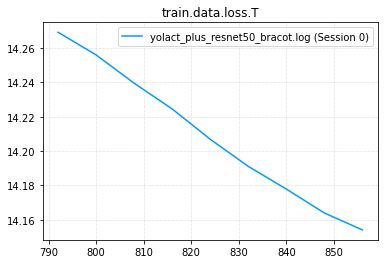

In [ ]:
vis.plot('train', 'x.data.iter * s.data.batch_size', 'x.data.loss.T', smoothness=1000)

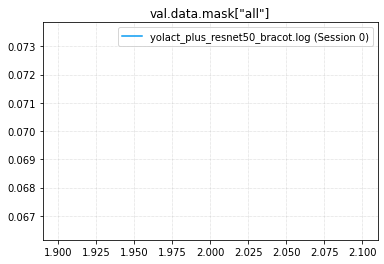

In [ ]:
vis.plot('val', 'x.data.epoch', 'x.data.mask["all"]')

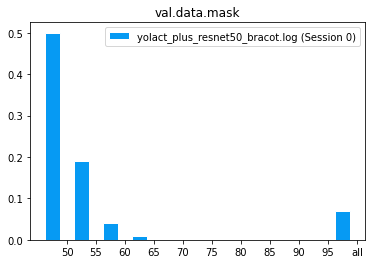

In [ ]:
vis.bar('val', 'x.data.mask', x_idx=-1)